<h1><center>Data Exploration</h1>

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from scipy.stats import shapiro, spearmanr, kendalltau
from scipy.stats import mannwhitneyu, kruskal
from scipy.stats import chi2_contingency
import statsmodels.api as sm

import pandas as pd
import numpy as np

from datetime import datetime

In [11]:
df=pd.read_csv('../csv/dataset_final.csv',index_col=0)

## Analyse préliminaire

In [13]:
# Nous avons 780 lignes et 39 colonnes
df.shape

(780, 39)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 780 entries, 0 to 779
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id_advert                     780 non-null    int64  
 1   modele                        780 non-null    object 
 2   size                          780 non-null    object 
 3   brand                         780 non-null    object 
 4   price                         780 non-null    float64
 5   price_decimal                 780 non-null    int64  
 6   ressell_price                 780 non-null    int64  
 7   promoted                      780 non-null    bool   
 8   identic_title_description     780 non-null    int64  
 9   short_description             780 non-null    int64  
 10  secure_description            780 non-null    int64  
 11  has_emoji_description         780 non-null    int64  
 12  other_campus_dressing         780 non-null    float64
 13  other_camp

In [15]:
#Taux de Na pour chaque variable
# deux variables avec des Na gender et city
(df.isna().sum()/len(df))*100

id_advert                        0.000000
modele                           0.000000
size                             0.000000
brand                            0.000000
price                            0.000000
price_decimal                    0.000000
ressell_price                    0.000000
promoted                         0.000000
identic_title_description        0.000000
short_description                0.000000
secure_description               0.000000
has_emoji_description            0.000000
other_campus_dressing            0.000000
other_campus_dressing_count      0.000000
hype_products_dressing           0.000000
hype_products_dressing_count     0.000000
other_campus_sell                0.000000
other_campus_sell_count          0.000000
hype_products_sell               0.000000
hype_products_sell_count         0.000000
description_user                 0.000000
sell_sneaker_account             0.000000
item_count                       0.000000
total_items_count                0

In [19]:
nb_doublons = df.duplicated().sum()
print("Nombre de doublons :", nb_doublons)

Nombre de doublons : 0


## Exploration des variables

#### Pour chaque Variable:
- Info
- Taux de Na
- Valeurs et Nombre de valeurs distinctes
- Étendue des valeurs, Équilibre
- Graphique en barres pour la fréquence de chaque catégorie (si possible)
- Vérification si la varible suit une loi normale (si possible)

| Nom de la variable | Description | Nom de la varaible | Description                           |
| ------------------ | --------------- | ----------------- | ------------------------------------- |
| id_advert          | id annonce             | description_user                 | l'annonceur possède une description          |
| modele          | nom du modele de campus             | sell_sneaker_account            | compte de revente de produits hype         |
| size          | taille de la paire          | item_count              | nombre de produits dans le dressing de l'annonceur          |
| brand                | marque de la paire            | total_items_count               | nombre total de produits dans le dressing de l'annonceur depuis sa création                                  |
| price           | prix demandé par l'annonceur            | given_item_count                | nombre total de produits vendus          |
| price _decimal          | le prix comporte-t-il des chiffres décimals douteux             | taken_item_count           | nombre total de produits achetés         |
| ressell_price         | prix du marché           | feedback_reputation               | moyenne des notes de l'annonceur          |
| promoted                | annnonce mise en avant (boostée)             | followers_count                 | nombre de personnes qui suivent l'annonceur                                   |
| identic_title_description          |  titre et description de l'annonce identiques            | following_count                 | nombre de personnes que suit l'annonceur         |
| short_description          | description courte            | gender           | genre de l'annonceur         |
| secure_description           | description qui semble secure          | photo             | présence photo de profil annonceur         |
| has_emoji_description                | description contient des emojis       | is_publish_photos_agreed               | photot de profil acceptée                                  |
| other_campus_dressing         | pourcentage d'autres campus dans le dressing de l'annonceur             | expose_location                 | annonceur accepte de montrer sa localisation    |
| other_campus_dressing_count          | nombre d'autres campus dans le dressing de l'annonceur              | city            | ville de publication de l'annonce           |
| hype_products_dressing         | pourcentage de produits hype dans le dressing de l'annonceur           | country_title              | pays de publication de l'annonce          |
| hype_products_dressing_count               | nombre de produits hype dans le dressing de l'annonceur  |       verification_facebook              | compte vérifié par facebook                                 |
| other_campus_sell           | pourcentage d'autres campus vendues par l'annonceur              | verification_google               | compte vérifié par compte google          |
| other_campus_sell_count          | nombre d'autres campus vendues par l'annonceur             | verification_phone          | compte vérifié par téléphone          |
| hype_products_sell          | pourcentage de produits hype vendues par l'annonceur           | scam            | Variable cible: annonce frauduleuse          |
| hype_products_sell_count               | nombre de produits hype vendues par l'annonceur           |  ...             |     ...                           |


### Variables explicatives

#### Variables qualitatives

##### Modele

In [21]:
df['modele'].info()

<class 'pandas.core.series.Series'>
Index: 780 entries, 0 to 779
Series name: modele
Non-Null Count  Dtype 
--------------  ----- 
780 non-null    object
dtypes: object(1)
memory usage: 12.2+ KB


In [22]:
# Taux de na
(df["modele"].isna().sum())/(len(df.index))

0.0

In [23]:
# Valeurs et Nombre de valeurs distinctes
print(df["modele"].unique())
df["modele"].nunique() 

['black' 'grey' 'green' 'crystal' 'pink' 'blue' 'green ' 'red' 'brown'
 'crystal ' 'orange' 'beige' 'light_pink' 'black_korn' 'green_black'
 'green_yellow' 'brown_black' 'yellow' 'purple']


19

In [25]:
# Étendue des valeurs, Équilibre
df["modele"].value_counts()

modele
black           343
grey            292
green            46
blue             24
crystal          22
pink             13
red              11
beige             8
orange            5
purple            3
crystal           3
yellow            2
brown             2
green             1
light_pink        1
green_black       1
black_korn        1
brown_black       1
green_yellow      1
Name: count, dtype: int64

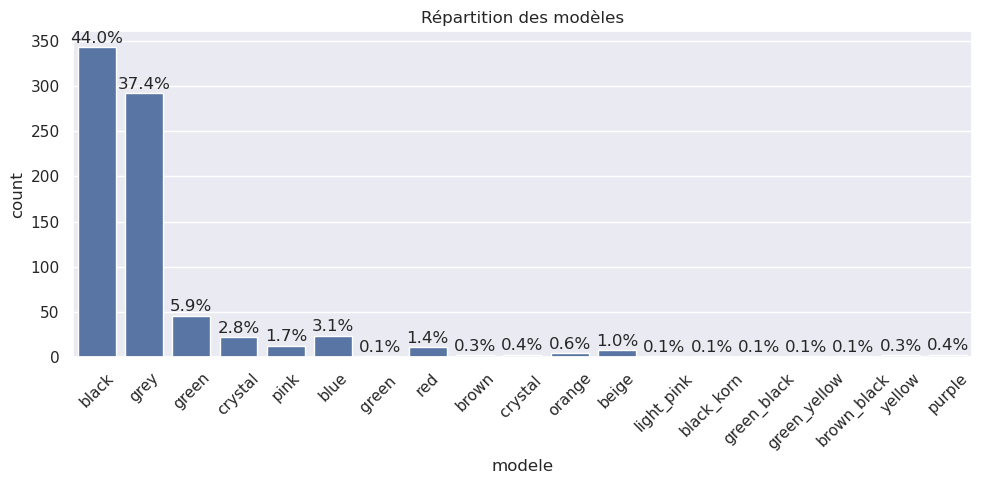

In [43]:
# Graphique en barres pour la fréquence de chaque modele
plt.figure(figsize=(10,5))
ax = sns.countplot(x="modele", data=df)
plt.title("Répartition des modèles")
# Ajouter le nombre et la proportion de chaque modele sur les barres
total = len(df["modele"])
for p in ax.patches:
    percentage = f'{100*p.get_height()/total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Brand

#### Variables quantitatives

##### Size

In [28]:
# type, nombres valeurs
df["size"].info()

<class 'pandas.core.series.Series'>
Index: 780 entries, 0 to 779
Series name: size
Non-Null Count  Dtype 
--------------  ----- 
780 non-null    object
dtypes: object(1)
memory usage: 12.2+ KB


In [29]:
# Taux de na
(df["size"].isna().sum())/(len(df.index))

0.0

In [30]:
# Valeurs et Nombre de valeurs distinctes
print(df["size"].unique()) 
df["size"].nunique() 

['39' '37' '38' '41' '37.5' '40' '43' '42' '36' '38.5' '44,5' '35' '44'
 '35.5' '36.5' '45' '42,5' '41,5' '39.5' '46' '40.5' '45,5' '40,5' '39,5'
 '48' '47' '38,5' '43,5' '41.5']


29

In [31]:
# Étendue des valeurs, Équilibre
df["size"].value_counts()

size
39      144
38      144
40       70
37       64
38.5     60
42       55
41       43
36       36
37.5     30
43       24
44       21
36.5     18
40.5     11
42,5      9
44,5      9
45        9
40,5      6
35.5      5
46        4
39.5      4
41,5      4
43,5      2
38,5      2
35        1
45,5      1
48        1
39,5      1
47        1
41.5      1
Name: count, dtype: int64

In [32]:
# Valeur Minimale
df["size"].min()

'35'

In [33]:
# Valeur Maximale
df["size"].max()

'48'

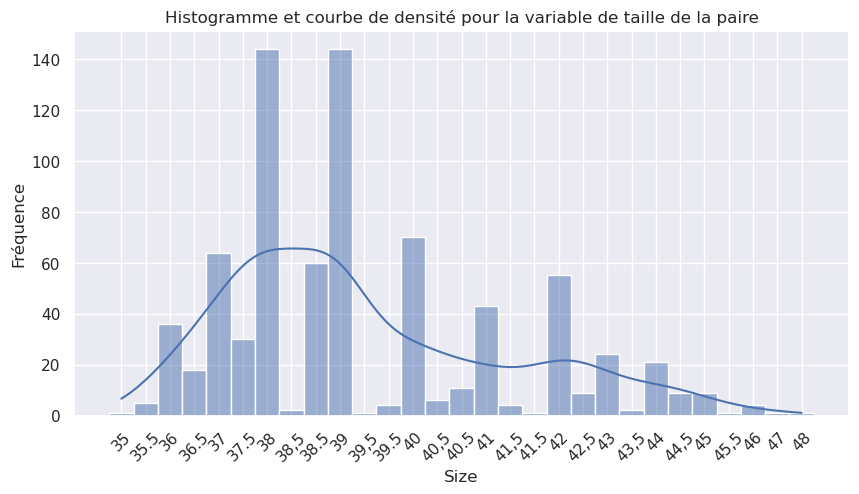

In [40]:
plt.figure(figsize=(10, 5))
df_sorted = df.sort_values('size')
sns.histplot(df_sorted['size'], kde=True)
plt.xlabel('Size')
plt.ylabel('Fréquence')
plt.title("Histogramme et courbe de densité pour la variable de taille de la paire")
plt.xticks(rotation=45)  # Modifier cet angle selon tes préférences
plt.show()

### Variable cible